# Basic Usage of the OSM-flex module

### Step 1: Downloading data dumps

In [1]:
import osm_flex.download

ModuleNotFoundError: No module named 'osm_flex'

In [3]:
import sys
sys.path.append('/Users/evelynm/osm-flex/src/osm_flex')
import download as dl

Download Switzerland country file from geofabrik to ~/osm/osm_bpf folder

In [7]:
iso3 = 'CHE'
dl.get_country_geofabrik(iso3)

Download Central America regional file from geofabrik to ~/osm/osm_bpf folder

In [10]:
region = 'central-america'
dl.get_region_geofabrik(region)

### Step 2: Extracting geospatial data

In [12]:
import extract as ex
import config

Using pre-written wrappers for certain critical infrastructure types (check which ones are available)

In [13]:
# available wrapper categories:
config.DICT_CIS_OSM.keys()

dict_keys(['education', 'healthcare', 'water', 'telecom', 'road', 'main_road', 'rail', 'air', 'gas', 'oil', 'power', 'wastewater', 'food', 'buildings'])

In [16]:
gdf_che_rail = ex.retrieve_cis(str(config.OSM_DATA_DIR.joinpath('switzerland-latest.osm.pbf')), 'rail')

extract multipolygons: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2824/2824 [01:23<00:00, 33.67it/s]
/Users/evelynm/osm-flex/src/osm-flex/extract.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(
extract lines: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51861/51861 [00:34<00:00, 1485.37it/s]
/Users/evelynm/osm-flex/src/osm-flex/extract.py:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(


<Axes: >

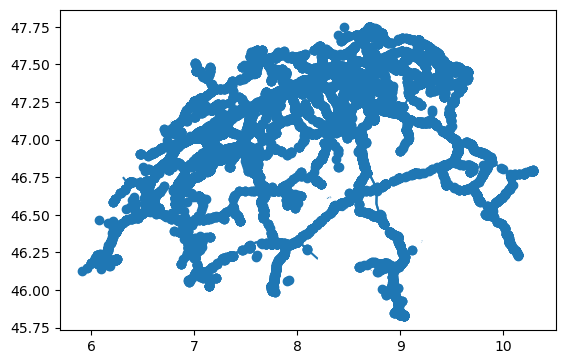

In [17]:
gdf_che_rail.plot()

Using key and value tags from OSM (see osm-taginfo)

In [19]:
gdf_ca_forest = ex.retrieve(str(config.OSM_DATA_DIR.joinpath('central-america-latest.osm.pbf')),'multipolygons', 
                            ['landuse', 'name'], "landuse='forest'")

Warning 1: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
extract multipolygons: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7578/7578 [01:32<00:00, 81.79it/s]


<Axes: >

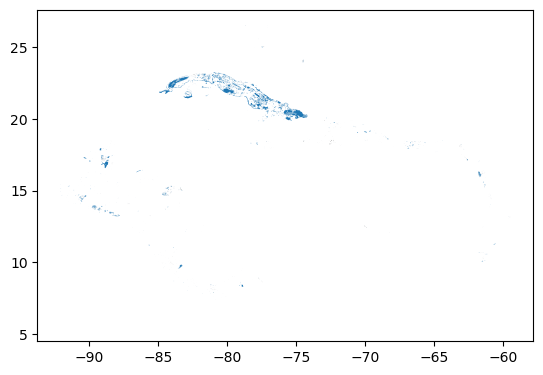

In [20]:
gdf_ca_forest.plot()